In [122]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [215]:
df=pd.read_csv('test_1_dataset.csv')
df.head()

,id,names,date,like,share,Followers,comment,timespend(hrs)
0,1,abhey,08-08-2022,20,13,2,20,1
1,2,manpreet,09-08-2022,345,45,456,12,2
2,3,sukh,09-07-2022,34,33,45,1,5
3,4,jaskarn,07-05-2022,345,3,34,2,2
4,5,gurjot,04-01-2022,455,13,56,3,1


In [144]:
df.describe()

,id,like,share,Followers,comment,timespend(hrs)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,9.361111,308.916667,12.527778,710.972222,14.388889,2.583333
std,6.870861,514.403198,17.509974,1504.588705,19.373440,1.380993
min,1.000000,9.000000,0.000000,2.000000,1.000000,1.000000
25%,3.000000,34.000000,3.000000,42.750000,3.750000,1.000000
50%,8.500000,121.500000,5.500000,234.000000,7.500000,2.000000
75%,15.000000,454.000000,13.000000,563.000000,14.000000,3.250000
max,24.000000,3034.000000,67.000000,7526.000000,90.000000,5.000000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              36 non-null     int64 
 1   names           36 non-null     object
 2   date            36 non-null     object
 3   like            36 non-null     int64 
 4   share           36 non-null     int64 
 5   Followers       36 non-null     int64 
 6   comment         36 non-null     int64 
 7   timespend(hrs)  36 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 2.4+ KB


In [146]:
df.shape

(36, 8)

# Data cleaning 

### check for null values

In [147]:
df.isnull().sum()      #there is no null values in dataset

id                0
names             0
date              0
like              0
share             0
Followers         0
comment           0
timespend(hrs)    0
dtype: int64

###  check for duplicated values

In [148]:
df.duplicated().any()   #there is no duplicated values in dataset

False

## -----------------------------------------------------------------------------------------------------------------------------------

# Q1-calculate the total number of actions performed by each user

In [149]:
d=df.groupby('names')[['like','share','comment']].sum()
d

,like,share,comment
names,,,
abhey,519,20,109
alka,713,16,24
aman,1100,11,10
arsh,33,8,6
avi,45,3,6
babita,635,19,35
gurjot,455,13,3
jaskarn,345,3,2
krishan,121,3,22


In [151]:
d['total_action']=d['like']+d['share']+d['comment']
d

,like,share,comment,total_action
names,,,,
abhey,519,20,109,648
alka,713,16,24,753
aman,1100,11,10,1121
arsh,33,8,6,47
avi,45,3,6,54
babita,635,19,35,689
gurjot,455,13,3,471
jaskarn,345,3,2,350
krishan,121,3,22,146


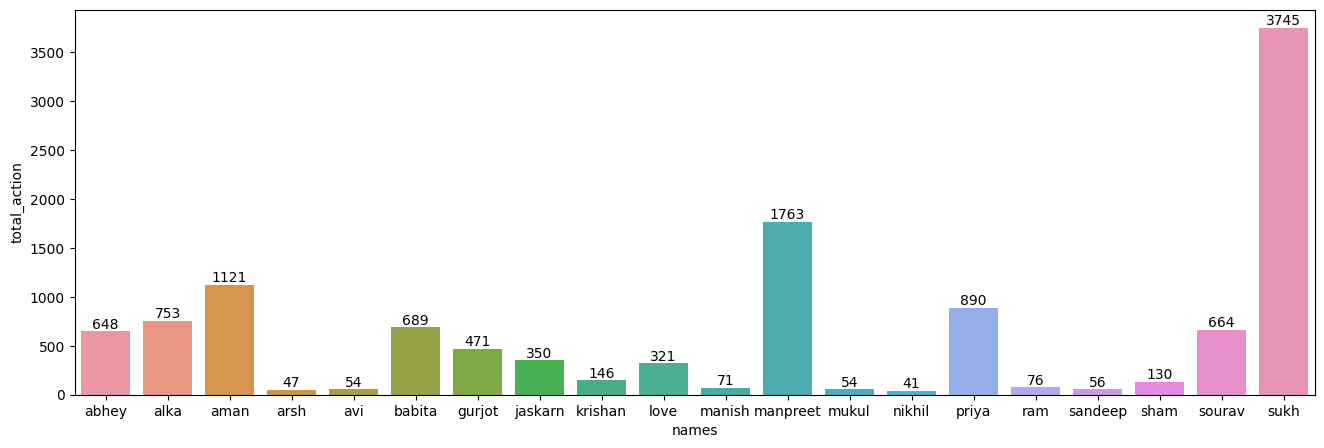

In [152]:
plt.figure(figsize=(16,5))
a=sns.barplot(data=d,x=d.index,y='total_action')
for i in a.containers:
    a.bar_label(i)

####  From the graph above graph, we observed all users actions.

## ----------------------------------------------------------------------------------------------------------------------------------

# Q2-determine the most common action perform users 

In [132]:
df.head()

,id,names,date,like,share,Followers,comment,timespend(hrs)
0,1,abhey,08-08-2022,20,13,2,20,1
1,2,manpreet,09-08-2022,345,45,456,12,2
2,3,sukh,09-07-2022,34,33,45,1,5
3,4,jaskarn,07-05-2022,345,3,34,2,2
4,5,gurjot,04-01-2022,455,13,56,3,1


In [133]:
l=df['like'].mean()
l

308.9166666666667

In [134]:
s=df['share'].mean()
s

12.527777777777779

In [153]:
c=df['comment'].mean()
c

14.38888888888889

In [154]:
lab=['like','share','comment']

In [168]:
m = [0.2, 0, 0]

Text(0.5, 1.0, 'most common action')

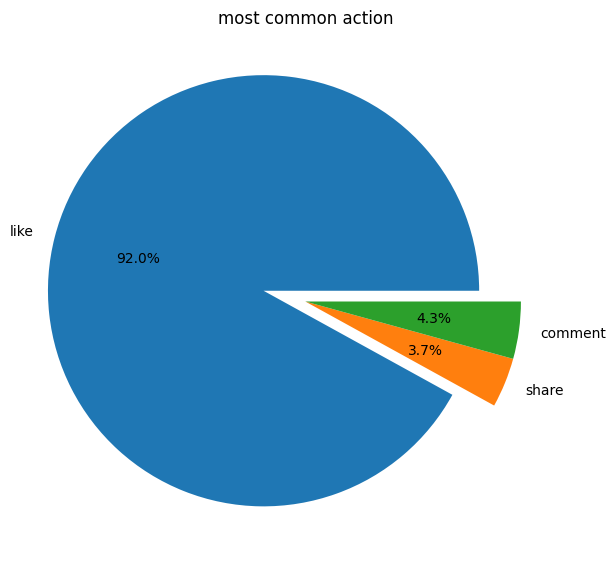

In [169]:
plt.figure(figsize=(7,7))
plt.pie(labels=lab,x=[l,s,c],autopct="%1.1f%%",explode = m)
plt.title('most common action')

#### from above answer we observed that the mean of like is more then others

## -----------------------------------------------------------------------------------------------------------------------------------

# Q3-identify the user who has the highest engagement (sum of all actions)

In [157]:
d.head()

,like,share,comment,total_action
names,,,,
abhey,519,20,109,648
alka,713,16,24,753
aman,1100,11,10,1121
arsh,33,8,6,47
avi,45,3,6,54


In [158]:
d.sort_values(['total_action'],ascending=False).head(1)

,like,share,comment,total_action
names,,,,
sukh,3556,150,39,3745


# visualizations

In [159]:
so=d.total_action.sort_values(ascending=False)
so

names
sukh        3745
manpreet    1763
aman        1121
priya        890
alka         753
babita       689
sourav       664
abhey        648
gurjot       471
jaskarn      350
love         321
krishan      146
sham         130
ram           76
manish        71
sandeep       56
mukul         54
avi           54
arsh          47
nikhil        41
Name: total_action, dtype: int64

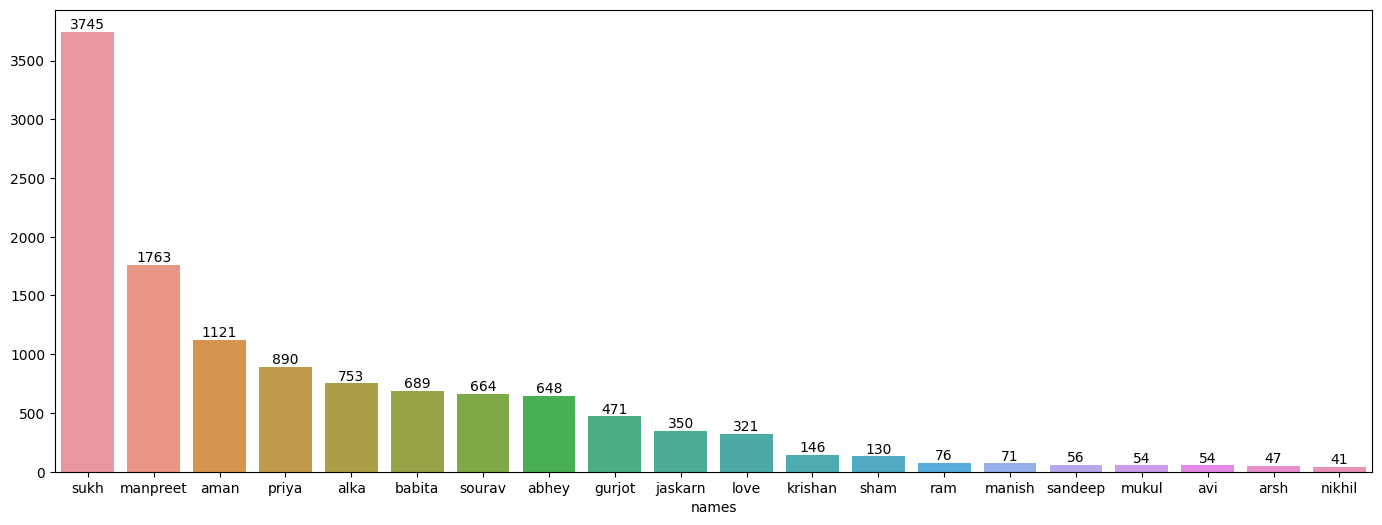

In [160]:
plt.figure(figsize=(17,6))
q=sns.barplot(data=d,x=so.index,y=so.values)
for i in q.containers:
    q.bar_label(i)

#### From the above graph, we can observe that the user 'Sukh' has the highest engagement among all of them

## the graph shows the sukh actions

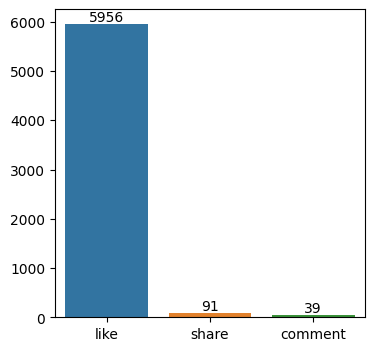

In [161]:
plt.figure(figsize=(4,4))
a=sns.barplot(y=[5956,91,39],x=['like','share','comment'])
for i in a.containers:
    a.bar_label(i)


## -----------------------------------------------------------------------------------------------------------------------------------

# Q4-provide statistics on user activity over time (eg. hourly,daily,or monthly trends)

In [162]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [163]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [164]:
df['day'] = pd.DatetimeIndex(df['date']).day

In [211]:
df

,id,names,date,like,share,Followers,comment,timespend(hrs),year,month,day
0,1,abhey,08-08-2022,20,13,2,20,1,2022,8,8
1,2,manpreet,09-08-2022,345,45,456,12,2,2022,9,8
2,3,sukh,09-07-2022,34,33,45,1,5,2022,9,7
3,4,jaskarn,07-05-2022,345,3,34,2,2,2022,7,5
4,5,gurjot,04-01-2022,455,13,56,3,1,2022,4,1
5,6,sourav,21-09-2022,454,5,78,4,1,2022,9,21
6,7,nikhil,22-07-2022,34,0,56,7,2,2022,7,22
7,8,mukul,25-05-2022,34,9,72,11,1,2022,5,25
8,9,love,29-01-2022,290,8,6,23,2,2022,1,29
9,10,ram,05-05-2022,65,5,276,6,2,2022,5,5


In [166]:
df.groupby(['year','month','names'])['timespend(hrs)'].sum()

year  month  names   
2020  9      babita      1
2021  1      arsh        5
             krishan     2
      3      priya       1
      4      avi         4
      8      alka        3
             aman        5
             manish      3
             sandeep     1
             sham        4
      9      alka        2
             aman        1
             babita      3
      10     sukh        5
2022  1      love        2
             priya       1
      2      manpreet    3
      4      gurjot      1
      5      mukul       1
             ram         2
      6      priya       5
      7      jaskarn     2
             nikhil      2
      8      abhey       1
      9      abhey       2
             alka        1
             manpreet    2
             sourav      1
             sukh        5
2023  1      manpreet    4
      3      abhey       3
             sukh        3
      8      abhey       3
             sourav      2
             sukh        3
      9      manpreet    4
Name: 

####  From the above answer, we clearly see the statistics of user activity and how much time they spend on that on a monthly and years basis. 